In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [4]:
# Open the file
output = np.genfromtxt('../output.dat')

# Load the data
t = output[:,0]
x1 = output[:,1]
y1 = output[:,2]
# dx1_dt 3
# dy1_dt 4
x2 = output[:,5]
y2 = output[:,6]
# dx2_dt 7
# dy2_dt 8
x3 = output[:,9]
y3 = output[:,10]
# dx3_dt 11
# dy3_dt 12

# Set parameters
nt = t.size
dt = t[1] - t[0]

xmin = min(np.amin(x1), np.amin(x2), np.amin(x3))
xmax = max(np.amax(x1), np.amax(x2), np.amax(x3))
ymin = min(np.amin(y1), np.amin(y2), np.amin(y3))
ymax = max(np.amax(y1), np.amax(y2), np.amax(y3))

<IPython.core.display.Javascript object>


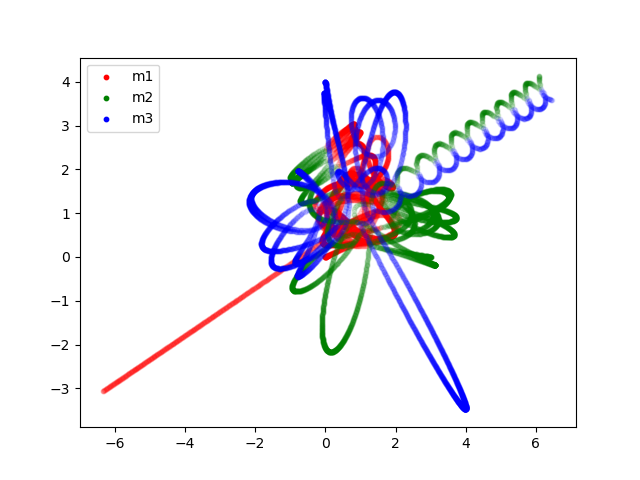

In [22]:
# Plot the position points of three mass bodies

fg, ax = plt.subplots(1,1)

ax.scatter(x1, y1, s=10, color='r', label='m1', alpha=0.1)
ax.scatter(x2, y2, s=10, color='g', label='m2', alpha=0.1)
ax.scatter(x3, y3, s=10, color='b', label='m3', alpha=0.1)

# Show legend without transparency
lgd = ax.legend()
for lh in lgd.legendHandles: 
    lh.set_alpha(1)

<IPython.core.display.Javascript object>


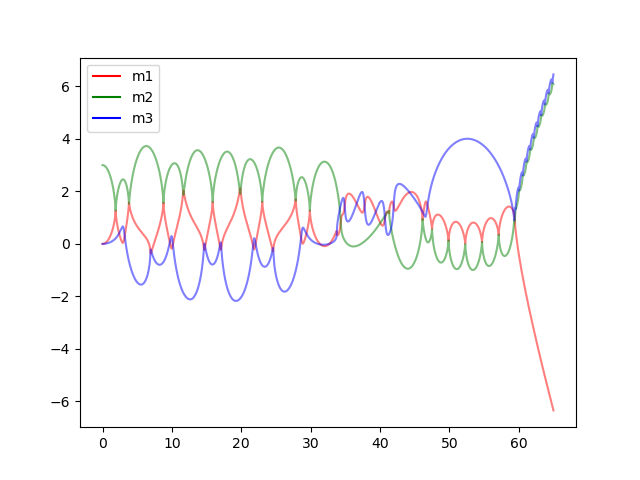

In [27]:
# Plot the time series of the positions
fg, ax = plt.subplots(1,1)

ax.plot(t, x1, color='r', label='m1', alpha=0.5)
ax.plot(t, x2, color='g', label='m2', alpha=0.5)
ax.plot(t, x3, color='b', label='m3', alpha=0.5)

# Show legend without transparency
lgd = ax.legend()
for lh in lgd.legendHandles: 
    lh.set_alpha(1)

<IPython.core.display.Javascript object>


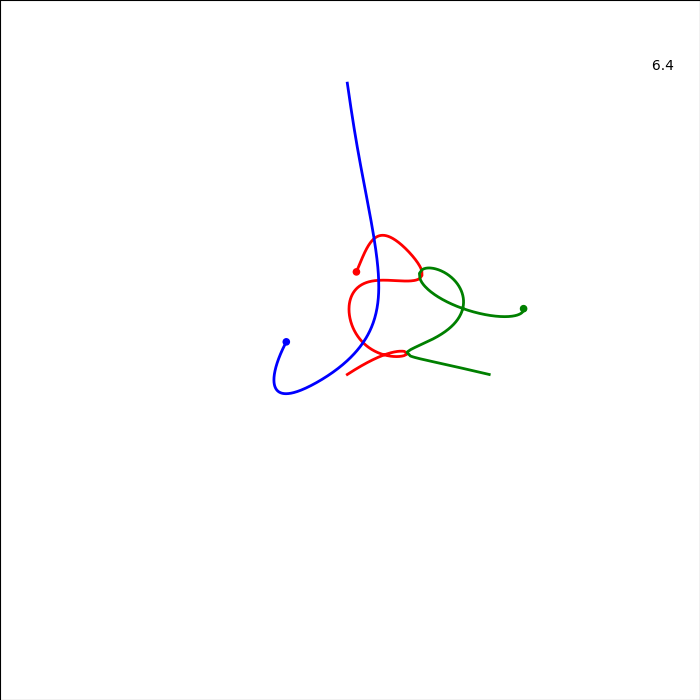

In [32]:
# Show the animation

# Create the figure
fg = plt.figure(figsize=(7, 7))

# Add the axes
ax = fg.add_axes([0, 0, 1, 1]) # , frameon=False)

# Set the xlim and ylim
ax.set_xlim([xmin-1, xmax+1])
ax.set_ylim([ymin-1, ymax+1])

# 
scat = ax.scatter([x1[0], x2[0], x3[0]], [y1[0], y2[0], y3[0]], s=20, c=['r', 'g', 'b'])
text = ax.text(0.9, 0.9, '0', transform = ax.transAxes)
line1, = ax.plot([], [], '-', lw=2, c='r')
line2, = ax.plot([], [], '-', lw=2, c='g')
line3, = ax.plot([], [], '-', lw=2, c='b')
foox1 = []
fooy1 = []
foox2 = []
fooy2 = []
foox3 = []
fooy3 = []

data = np.zeros((3,2))
first_loop = True
def update(t):
    """
    " t is from 0 to nt-1
    """
    
    global foox1, fooy1, foox2, fooy2, foox3, fooy3, first_loop
    
    ind = t
    time = t*dt
    nshow = 0
    
    # if (ind % int(nt/100)) == 0:
    #     xmin = np.amin([x1[ind], x2[ind], x3[ind]])
    #     xmax = np.amax([x1[ind], x2[ind], x3[ind]])
    #     ymin = np.amin([y1[ind], y2[ind], y3[ind]])
    #     ymax = np.amax([y1[ind], y2[ind], y3[ind]])
    #     ax.set_xlim((xmin-1, xmax+1))
    #     ax.set_ylim((ymin-1, ymax+1))
    
    data[:,0] = np.array([x1[ind], x2[ind], x3[ind]])
    data[:,1] = np.array([y1[ind], y2[ind], y3[ind]])

    scat.set_offsets(data)
    
    text.set_text('{0:8.1f}'.format(time)) 

    
    if first_loop:
        foox1.append(x1[ind])
        fooy1.append(y1[ind])
        foox2.append(x2[ind])
        fooy2.append(y2[ind])
        foox3.append(x3[ind])
        fooy3.append(y3[ind])
        line1.set_data(foox1[-nshow:], fooy1[-nshow:])
        line2.set_data(foox2[-nshow:], fooy2[-nshow:])
        line3.set_data(foox3[-nshow:], fooy3[-nshow:])
    
    if ind == nt-1:
        first_loop = False
    
    return scat,line1,line2,line3,text

# Start the animation
ani = FuncAnimation(fg, update, frames=nt, interval=2, blit=False)